# Making a Canopy Height Model (CHM) Using USGS 3D Elevation Program (3DEP) Data


<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Authors</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href= "Define-Functions" data-toc-modified-id="Define-Functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define Functions</a></span></ul><li><span><a href="#Data-Access-and-Visualization" data-toc-modified-id="Data-Access-and-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Access and Visualization</a></span><ul class="toc-item"><li><span><a href="#Access-3DEP-Data" data-toc-modified-id="Access-3DEP-Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Access 3DEP Data</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-And-Define-AOI" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create Interactive Ipyleaflet Map and Define AOI</a></span></li><li><span><a href="Find-Intersecting-3DEP-Polygons" data-toc-modified-id="Find-Interseciting-3DEP-Polygons-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Find Intersecting 3DEP Polygons</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Resources</a></span></li></div>
    

<h2>Authors</h2>
<a id='#Authors'></a>

<h2>Purpose</h2>
<a id='#Purpose'></a>

The United States Geological Survey's 3-D Elevation Program (3DEP)is an ongoing effort to provide high-quality topographic -- light detection and ranging (lidar) -- data for the entire conterminous United States, Hawaii, the U.S territories, and Interferometric Synthetic Aperture Radar (IfSAR) for Alaska over an 8-year period. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of >42 trillion points covering an area of > 6 million $km^{2}$ already available for use.

3DEP point cloud data can be downloaded on the web from a variety of resources including the <a href="https://portal.opentopography.org/datasets">OpenTopography Portal</a> (restricted to academic users) and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. Due to limited computational resources, these web services implement limits on the spatial extent over which point cloud data may be accessed for a single job. In some cases, however, it may benefit users seeking raw, uprocessed point cloud data over large extents to be able to programmatically access, process, and visualize 3DEP point cloud data from a specific area of interest on their local workstation without the web service limitations. 

This Jupyter notebook is one of two developed focusing on enhancing access and usability of 3DEP data and derivative products. This notebook provides functions, pipelines, and overall workflow for effectively and efficiently accessing documents a Python-based workflow for accessing, processing, and visualizing 3DEP data, leveraging available APIs and cloud resources.

<h4>Specific features of this notebook</h4>

- Users may (1) select an area of interest (AOI) directly in an interactive map within this notebook; (2) import a shapefile or geoJSON file; or (3) directly input coordinate boundaries for their region of interest (**Not yet implemented**).

- The corresponding 3DEP point cloud dataset is accessed programmatically from the <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) public EPT (Entwine Point Tile) bucket</a>, implementing the user-defined AOI and made available for subsequent processing.

- Flexibile and customizable PDAL pipelines are available for reclassifying, filtering, and computing derivate products based on user-defined specifications.
 
- DTM and DSM generation with option to save (or not) point cloud data and/or DTM/DTM products.

- Canopy height model generated from DSM and DTM and saved to user's local file system.

<h4>Additional resources</h4>
Two additional Python-based workflow have been developed and are availble in Jupyter Notebook format for: <br>
  
1. <a href="http://localhost:8888/notebooks/notebooks/3DEP_pointcloud_access_processing_DTM_creation.ipynb#Programmatically-accessing,-processing,-and-visualizing-USGS-3D-Elevation-Program-(3DEP)-data-for-user-defined-area-of-interest.ipynb"> Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) data for user-defined area of interest </a>. <br>

2. <a href="https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Programmatically_accessing_3DEP_data_using_USGS_7.5_Quadrangles.ipynb"> Programmatically accessing, processing, and visualizing 3DEP data using USGS 7.5' Quadrangles</a>. <br>

3. <a href = "https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/3DEP_data_for_watershedboundaries.ipynb"> Programmatically accessing, processing and visualizing 3DEP data using the USGS 12- and 14-digit Hydrologic Unit Codes (HUCs) </a>.

4. <a href="https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Topographic_differencing_3DEP_and_OT_lidar_data.ipynb"> Programmatically accessing 3DEP co-located point cloud data and producing topographic difference products</a>.

5. <a href = "https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/colorizePC.ipynb"> Programmatically accessing 3DEP data and producing colorized point clouds using NAIP 1m imagery </a>.
    
<h2>Funding</h2>
<a id='#Funding'></a>

Funding for the creation and distribution of these Jupyter Notebook-based workflows was provided as by the Community for Data Integration through the funded award *"Enhancing usability of 3DEP data and web services with Jupyter notebooks"*, jointly awarded to OpenTopography and the US Geological Survey. OpenTopography is supported by the National Science Foundation under Award Numbers 1948997, 1948994 & 1948857

<h2>Keywords</h2>
<a id='#Keywords'></a>

keywords=["OpenTopography","USGS", "CDI", "3DEP", "PDAL", "CHM"]

<h2>Citation</h2>
<a id='#Citation'></a>

To cite this notebook:  Speed, C., Beckley, M., Crosby, C., & Nandigam, V. (2022). Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) lidar point cloud data for user-defined area of interest (Version v1.0). DOI: Accessed: MM/DD/YYYY

## 6. Setup

This notebook provides a self-contained workflow for accessing, processing, and visualizing 3DEP point cloud data and generating digital elevation models (DEMs). The notebook is designed to be executed in its unmodified form, but can also be customized to fit the specific use-case. There are two options for performing this workflow outlined below. Option 1 is our suggested method for simplicity, as building the virtual environement with the required dependencies on the user's local filesystem can be tricky based on the user's experience level with Python and Anaconda.

1. **Option 1**: Launch the interactive Jupyter notebook on Google Colaboratory.
    - Follow the steps outlined in 6.1 Install and run on Google Colaboratory (Hyperlink this to 6.1).
    - Does not require creation of a virtual environment or installation on local filesystem.
    - Requires Google account and access to personal Google Drive folder.
    - Data download limits will be dependent on user's available Google Drive storage. 
    - If you wish to run this notebook in Google Colaboratory click the 'Open in Colab' badge below. 
    <br/><br/>
2. **Option 2**: Download this Jupyter notebook (.ipynb file) to your local file system.
    - Follow the steps outlined in 6.2. Install and run on local filesytem. (hyper link this to the cell 6.2)
    - Create a virtual environement containing the required dependencies (see below).
    - Run Juypter notebook on local machine.
    - Data download limits will be dependent on user's available hard drive storage.

### 6.1.1. Option 1 - Install and run on Google Colaboratory
For ease-of-use, it is suggested to launch and execute these notebooks on Google Collaboratory (Colab, for short), Google's Cloud Platform. Dependencies will be installed on a virtual machine on Google's cloud servers and the code will be executed directly in your browser! A major benefit of this is that you will have direct access to Google high-end CPU/GPUs and will not have to install any dependencies locally. All deliverables will be saved to your personal Google Drive. To experiment and run one of the below Jupyter Notebooks on Google Colab click the "Open in Colab" badge below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Making_a_Canopy_Height_Model_Using_USGS_3DEP_Data.ipynb)

In [ ]:
### Exectute this block of cells if running on Google Colab
!git clone https://github.com/cmspeed/OT_3DEP_Workflows

In [ ]:
# Installs Conda, which is the easiest way to install PDAL in the Google Colab environment
# This will trigger a notification that the "Your session crashed for an unknown reason." 
# This is normal. Execute next cell.
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Import Conda and install PDAL ---- Takes 1-2 minutes
import condacolab
condacolab.check()
!mamba install -q python-pdal

In [ ]:
#  Install the remaining dependencies
!pip install -r OT_3DEP_Workflows/requirements.txt

In [ ]:
# Mount your Google Drive for saving content
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
### Runtime must be restarted now before import of PDAL will be successful!
### On Google Colab ribbon click "Runtime" > "Restart Runtime".  
### Do not execute any of the previous cells. Execute the following cells only.

**If using Option 1 (Google Colab), proceed to 6.2 Library Imports**

### 6.1.2. Option 2 - Install and run on Local Filesystem

If you would like to run the Jupyter Notebook on your local machine, execute the following commands in your terminal or commandline (does not vary between MacOS, Linux, or Windows):

Make a new directory where the 3DEP Jupyter Notebooks (and all 3DEP data, if desired) will be saved. In this case, the directory will be called `3DEP`.
  
    $ mkdir 3DEP

Change into the new directory and git clone the Github repository containing the Jupyter Notebooks and other relevant files to your local file system.

    $ cd 3DEP
$ git clone https://github.com/cmspeed/OT_3DEP_Workflows

Anaconda is recommended for Python package installation and management. Package versions in Anaconda are managed by the package management system *conda*. Anaconda installers for MacOS/Linux/Windows can be downloaded from https://docs.anaconda.com/anaconda/install/. Follow the instructions to install the appropriate version of Anaconda.

After installing Anaconda, create a conda virtual environment with the required dependencies (contained in `environement.yml`). Note: Exectuting the following command will automatically create the conda environement with name `3dep` and all of the required dependencies installed. If you would prefer a different name, replace `3dep` with another name in the following command:

	$ conda env create -n 3dep --file environment.yml

Activate the conda environment with all of the necessary dependencies installed. 
	
	$ conda activate 3dep

Now, launch the chosen Jupyter Notebook. If unsure how to launch a Notebook, refer to this guide (https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html). 

<h3> 6.2 Library Imports</h3>
<a id='#Library-Imports-6.1'></a>

After successfully creating a virtual environement using Option 1 or Option 2 above, proceed to import the necessary Python modules below.

In [1]:
#Import Modules
import os
import copy
import json
import pdal
from osgeo import gdal
import numpy as np
import geopandas as gpd
import math
import matplotlib
import matplotlib.pyplot as plt
import ipyleaflet
import ipywidgets as widgets
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform
import requests
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

<h3>6.3 Define Functions</h3>
<a id='#Define-Functions-6.2'></a>

Several functions are provided in the cell below. These functions are necessary for successful execution of remainder of the notebook. Broadly, these functions provide the utility for the user to draw and area of interest (AOI) on an interactive map and construct the PDAL pipeline for getting the point cloud data from the Amazon Web Services EPT bucket, performing processing steps, producing DEMs, and saving the results. A short explanation of each function is provided here for clarity, and a description of the parameters are provided as docstrings in the function definitions.

```gcs_to_proj()```: Projects a Shapely polygon (the user-defined AOI) from geographic coordinates, WGS84 (EPSG: 4326) -  the output of drawing the AOI on the interactive map - to Web Mercator projection (EPSG: 3857) - the projection of the 3DEP data.

```import_shapefile_to_shapely()```: Read a user's shapefile (.shp) and make a shapely object for use in defining the area for 3DEP extraction.

```handle_draw()```: Provides interactive drawing capability on ipyleaflet maps and storing the object for use as the input boundary in requesting 3DEP point cloud data.

```build_pdal_pipeline()```: Used to construct the pdal pipeline to request/process/ the point cloud data from AWS EPT public bucket.

```make_DEM_pipeline```: Used to construct the PDAL pipeline to perform steps in ```build_pdal_pipeline()``` and create a DEM (DSM or DTM) from the point cloud data.

**These functions can be modified as the user sees fit; however, they are designed to work with a simple execution of the below cell.**

In [2]:
def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG: 3857)). 
    
    :param poly: shapely polygon for user area of interest (AOI)
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)

def import_shapefile_to_shapely(path):
    """
    Conversion of shapefile to shapely object.
    
    :param path: location of shapefile on user's local filesystem
    """
    shapefile_path = path
    gdf = gpd.read_file(shapefile_path)
    user_shp = gdf.loc[0, 'geometry']
    user_shp_epsg3857 = gcs_to_proj(user_shp)
    user_AOI = [[user_shp, user_shp_epsg3857]]
    return user_AOI
    
def handle_draw(target, action, geo_json):
    """
    Allow user to draw area of interest (AOI) on interactive ipyleaflet map.
    
    :param extent_epsg3857: polygon for user-defined AOI
    :param usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps
    :param resolution: The desired resolution of the pointcloud based on the following definition:
    """
        
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds, 'Please proceed to the next cell.')
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857
    

def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_names, pc_resolution, filterNoise = False,
                        reclassify = False, savePointCloud = True, pc_outName = 'filter_test', pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data.
    
    Parameters:
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                            usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                            either through the 'handle_draw' methor or by inputing their own coordinates.
                            This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_names: List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                       this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is
    :param requested,the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
        this should be outType = ''
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """
    
    #this is the basic pipeline which only accesses the 3DEP data. There is an optional
    readers = []
    for name in usgs_3dep_dataset_names:
        url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(name)
        reader = {
            "type": "readers.ept",
            "filename": str(url),
            "polygon": str(extent_epsg3857),
            "requests": 3,
            "resolution": pc_resolution
        }
        readers.append(reader)
        
    pointcloud_pipeline = {
            "pipeline":
                readers
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7], Classification![18:18]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }
        
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = True, savePointCloud = False, pc_outName = 'filter_test', 
                      pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', dem_outName = 'dem_test', 
                      dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering or reclassifying). The user must also specify whether the point 
    cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

    :param dem_resolution: Desired grid size (in meteres) for output raster DEM 
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  this should be outType = ''
    :param demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
    :param gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'. ELABORATE MORE HERE.
    :param dem_outName: Desired name of DEM file on user's local filesystem.
    :param dem_outExt: DEM file extension. ELABORATE MORE HERE.
    :param driver: Driver used. ELABORATE MORE HERE.
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
    
    return dem_pipeline

## 7. Define Area of Interest (AOI) from Available 3DEP
Now that we have the required modules imported and functions defined, we can proceed with defining our area of interest (AOI) and accessing the 3DEP data from the Amazon Web Services EPT bucket. ## 7. Data Access and Visualization

<h3> 7.1 Get 3DEP Data Polygons</h3>
<a id='#Access-3DEP-Data-7.1'></a>

First, we will get the 3DEP dataset polygon boundaries so we will know if 3DEP data is currently available for our AOI. An up-to-date version of the currently available 3DEP dataset boundaries are maintained by Hobu Inc. in the Github repository https://github.com/hobuinc/usgs-lidar/. 

In the following cell, we obtain and save a local copy of these boundaries in geojson format using an API request to the repository. We create a geopandas dataframe object to easily access the names, url, and point count of each dataset, and we use the ```gcs_to_proj()``` function to project each 3DEP polygon geometry to Web Mercator projection (EPSG: 3857).

In [3]:
# Get GeoJSON file for 3DEP outlines from URL 


print("Requesting, loading, and projecting 3DEP dataset polygons...")

#this needs to be modified to always make a new pull, even if it exists because it is possible updated at the source.
url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
r = requests.get(url)
with open('resources.geojson', 'w') as f:
    f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    data = json.load(f)

geo_json_3DEP = ipyleaflet.GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 
                                       'weight':1.9, 'fillOpacity':0.1})

with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)

projected_geoms = []

for geometry in df['geometry']:
        projected_geoms.append(gcs_to_proj(geometry))

geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)
names = df['name']
urls = df['url']
num_points = df['count']

print('Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)')

Requesting, loading, and projecting 3DEP dataset polygons...
Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)


<h3> 7.2 Create Interactive Ipyleaflet Map and Define AOI</h3>
<a id='#Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2'></a>


Next, we will define our area of interest (AOI) using an ipyleaflet interactive map and the 3DEP dataset polygons loaded in the prior step.  There are currently two options for defining the AOI:

1. **Option 1** - User loads and uses their own shapefile (.shp) to define the AOI. 
2. **Option 2** - User draws a polygon on an ipyleaflet interactive map to define the AOI

In the following cell, if the user wishes to use their own shapefile (**Option 1**), the path to the .shp should be included between the quotes (e.g., ```shapefile = '/path/to/shapefile.shp'```). If the user wishes to draw an AOI on the map (**Option 2**), the path should be left blank (```shapefile = ''```). The cell must be run either way.
We then read in this geojson as an ipyleaflet object for visualization in an interactive map.

In [4]:
# Enter shapefile path, if applicable. Example: shapefile_path = '/path/to/shapefile.shp'.
# Otherwise leave as shapefile_path = ''
# Run this cell either way, or next cell will not run appropriately.
shapefile_path = ''

Running the next cell will produce an interactive map, make an ipyleaflet layer out of the 3DEP dataset polygon geojson, and allow the user to draw an AOI or use the shapefile as input. When the map is rendered, use the +/- symbols to zoom in and out. The currently available 3DEP datasets are shown in transparent green polygons. The current functionality of the notebook allows the user AOI to straddle multiple 3DEP datsets. In this case, points from both datasets will be queried and merged into the resulting las/laz file.

**Important Note 1: Use either the pentagon or rectangle shaped buttons on the left sidebar to define the AOI. The pentagon-shaped button will allow the user to draw a polygon of any shape, and the rectangle-shaped will result in a rectangular AOI. Either shape will work for the boundary parameter in the point cloud request, and either can be used to define the AOI.**

**Important Note 2: If the user would like to draw a new AOI, the cell below must be re-executed each and every time. If multiple AOIs are drawn on the same interactive map without re-executing the cell, subsequent cells will not function appropriately. The cell must be run each and every time the user would like to define a new AOI.**

**Important Note 3: There is currently no implementation to keep the user from defining an AOI econpassing billions of lidar points. However, if such an AOI is defined, the compute time and hard drive space required will be substantial. Depending on your personal computer specifications, massive point clouds may cause issues with available RAM. A later cell will provide an estimation of the total point count for the AOI, but it is advisable to keep the AOI ~5000 hectares or less. The area is shown on the interactive map when drawing the AOI.**

**Important Note 4 (Google Colaboratory Users Only): Every Google Colab instance has a RAM allotment of 12GB. This should be plenty to perform the desired tasks, assuming that an AOI of reasonble size is defined (see Important Note 3 for what is meant by 'reasonable size'). Testing of maximum possible point cloud size allowable on Google Colab instances has been minimal(other than to determine that point clouds up to several hundred million points are possible). If you perform such tests, please let us (cole.speed@beg.utexas.edu) know what you find!**

In [5]:
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(39, -100),
    zoom=3,
    crs=ipyleaflet.projections.EPSG3857
    )

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON

dc = ipyleaflet.DrawControl(
    rectangle={"shapeOptions": {"color": "#0000FF"}},
    circlemarker={},
    polyline={},
    
)

print('Select an Area of Interest using the tools on the left side of the map')
user_AOI = []
dc.on_draw(handle_draw)
m.add_control(dc)
m

Select an Area of Interest using the tools on the left side of the map


Map(center=[39, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

AOI is valid and has boundaries of  (-13504765.547756048, 5946735.731420435, -13500468.9493699, 5949900.6537174005) Please proceed to the next cell.


Now that the user-specified AOI is defined, the following cell will determine the intersecting 3DEP dataset names and show them on an interactive map. These names will be used in the API request to the AWS EPT bucket along with the user-defined quad. Importantly, after the map is rendered, the user must define the desired 'point cloud resolution' using the radio buttons below the map. An estimation of the total number of lidar points within the bounding box is provided based on the area of the AOI and the total number of lidar points in the 3DEP dataset(s). Selecting the "Full" option will return all points in the quad (this number can be quite large, depending on the size of the AOI). Selecting any of the other options for resoltuion will return the appropriate number of points to ensure at least one lidar point per Nth meter (where N is the chosen resolution). The user is not alone if they are at least somewhat confused by the concept of resolution in this sense. The Entwine Point Tile (EPT) file format utilizes an octree structure for the point cloud, and in essense, the chosen resolution defines how deep in the octree to request points to obtain the specified resolution. This depth, and total number points varies drastically based on a number of parameters including local topography and vegetation. Therefore, the 'resolution' paramater and the total point count do not scale linearly. In other words, specifying a resolution of 2m will likely return far less than half of the number of points returned with 'full' resolution. The estimate of the full poin total provided is not exact, but should give the user some idea of how many points to expect the resultant point cloud to contain. 

The next cell will show the relevant quadrangle, the relevant 3DEP datasets on another interactive map, and the option to specify point cloud resolution. Feel free to zoom and pan around, and select the appropriate radio button.

In [7]:
# Specify desired point cloud resolution
AOI_GCS = user_AOI[0][0]
AOI_EPSG3857 = user_AOI[0][1]
centroid =  list(AOI_GCS.centroid.coords)[0]

intersecting_polys = []
    
for i,geom in enumerate(geometries_EPSG3857):
    if geom.intersects(AOI_EPSG3857):
        intersecting_polys.append((names[i], geometries_GCS[i], geometries_EPSG3857[i], urls[i], num_points[i]))
        
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(centroid[1],centroid[0]),
    zoom=12,
    )

wlayer_3DEP_list = []
usgs_3dep_datasets = []
number_pts_est = []
for i, poly in enumerate(intersecting_polys):
    wlayer_3DEP = ipyleaflet.WKTLayer(
        wkt_string=poly[1].wkt, 
        style={"color": "#FFC20A"}, hover_style={"fillColor": "red"})
    
    m.add_layer(wlayer_3DEP)
    wlayer_3DEP_list.append(wlayer_3DEP)
    
    usgs_3dep_datasets.append(poly[0])
    number_pts_est.append((int((AOI_EPSG3857.area/poly[2].area)*(poly[4]))))

wlayer_user = ipyleaflet.WKTLayer(
    wkt_string=AOI_GCS.boundary.wkt,
    style={"color": "#0C7BDC"}
)

AOI_EPSG3857_wtk = AOI_EPSG3857.wkt

m.add_layer(wlayer_user)

area = int(AOI_EPSG3857.area/1e6)
num_pts_est = sum(number_pts_est)

user_resolution = widgets.RadioButtons(
    options=[
        (f'Full - All ~{int(math.ceil(num_pts_est/1e6)*1e6):,} points', 1.0),
        (f'High - 2m resolution', 2.0),
        (f'Mid  - 5m resolution', 5.0),
        (f'Low  - 10m resolution', 10.0)
    ],
    layout={'width': 'max-content'},
    disabled = False,
)

widgets.VBox(
    [m,
        widgets.Label(value=f'Your AOI at full resolution will include approximately {int(math.ceil(num_pts_est/1e6)*1e6):,} points. Select desired point cloud resolution.'),
        user_resolution
    ]
)

**Note**: Lidar point clouds can get *very* large, *very* fast. An AOI containing < 500,000,000 points *should* take less than ~20 minutes to access and store the data locally (or on Google Drive). An AOI containing < 50,000,000 points should take less than 5 minutes to do the same thing. Point clouds exceeding 1,000,000,000 points are accessible, even on local hardware, but they will take time to obtain and will likely require several to tens of gigabytes of storage on your local hard drive. Keep this in mind when deciding the AOI size and point cloud resolution above!

The AOI bounding box, the relevant 3DEP dataset name(s), and the desired point cloud resolution are now defined. We can proceed with the API request to the AWS EPT bucket, processing, visualizing, and saving the data.

The AOI bounding box, the relevant 3DEP dataset name(s), and the desired point cloud resolution are now defined. We can proceed with the API request to the AWS EPT bucket, processing, visualizing, and saving the data.

## 8. Data Processing
The Point Data Abstraction Library (PDAL) is an open-source .... PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Pipelines comprise one or more stages that are read and executed in order on the point cloud dataset(s). The following cells will construct a PDAL pipeline to do the heavy lifting for us and: (1) Make the API request to the AWS EPT bucket; (2) perform the desired processing step(s); and (3) write the resultant point cloud data to your Google Drive (For Google Colab users) or local filesystem.

### 8.1 Construct PDAL Pipeline
The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function, and will construct the appropriate pipeline for the user's specifications (defined as function arguments). Executing this pipeline will make the API request, perform processing on the point cloud data (chosen by user) and provide the final result on the user's filesystem of Google Drive (Google Colab). Explanations of input parameters are can be found in this cell, and in more detail in the fuction definition cell (Section 6.3). Importantly, the ```outputs``` parameter is where the user may define the processing and outputs that they wish to produce. 

Paramaters: <br>
```AOI_EPSG3857_wtk```: the user-defined area of interest (AOI)<br>
```usgs_3dep_dataset```: the corresponding 3DEP dataset name<br>
```pointcloud_resolution```: point cloud resolution (1m, 2m, 5m, 10m)<br>
```filterNoise```: remove the points of Class 7 (low noise) and Class 18 (high noise); optional<br>
```reclassify```: remove USGS classes and run an SMRF to classify ground points only; optional<br>
```savePointCloud```: specify if point cloud data should be saved to local file system; optional<br>
```pc_outName```: name of point cloud on local file system<br>
```pc_outType```: file type, |las or laz (laszip compression). Options are 'las' or 'laz'<br>

**Important Note 1: The ```AOI_EPSG3857_wtk```, ```usgs_3dep_datasets```, and ```pointcloud_resolution``` arguments are already defined after running cells in Section 7. These should not be modified.**

In the following cell, the user should define the ```dirname``` as the path for which the point cloud data will be saved (e.g., dirname = '/path/to/pointcloud/dir/'

In [8]:
# Do not modify AOI_EPSG3857_wtk, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change pc_outname to descriptive name and pc_outType to 'las' or 'laz'.

pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(AOI_EPSG3857_wtk, usgs_3dep_datasets, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = False, pc_outName = 'pointcloud',
                                  pc_outType = 'laz')

pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

In [9]:
%%time
pc_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 1min 42s, sys: 8.03 s, total: 1min 50s
Wall time: 1min 40s


65069147

If the user only desires point cloud data, they may stop here. Following is a quick overview showing how ground class may be gridded to create a DTM.

### 8. Construct Canopy Height Model (CHM)

Canopy height model requires creation of a digital surface model (DSM) and a digital terrain model (DTM; 'bare earth'). The CHM a vertical differencing of the DSM and DTM (CHM = DSM-DTM).

### 8.2.1 Make DSM

In [10]:
pointcloud_resolution = user_resolution.value
dsm_resolution = 2.0

dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_datasets, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dsm', gridMethod='idw', 
                                 dem_outName = 'test_dsm', dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [11]:
%%time
dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2min 24s, sys: 10.9 s, total: 2min 35s
Wall time: 1min 32s


65069147

### 8.2.2 Make DTM

In [12]:
pointcloud_resolution = user_resolution.value
dtm_resolution = 2.0

dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_datasets, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dtm', dem_outName ='test_dtm', 
                                 dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [13]:
%%time
dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 1min 52s, sys: 12.1 s, total: 2min 4s
Wall time: 1min 34s


6292845

### 8.2.2 Make Canopy Height Model (CHM)
Producing a canopy height model is as simple as differencing the DSM and DTM computed above. GDAL has a built in command line function for performing computation on rasters called `gdal_calc.py`.

If you would like to generate the CHM using the command line interface, the code for doing so is: <br>
`gdal_calc.py -A dtm.tif -B dsm.tif --calc="B-A" --outfile chm.tif`

Alternatively, running the following cells will produce a CHM using your input DSM and DTM.I n order to produce the CHM within the notebook we can achieve the same functionality using the GDAL Python bindings and numpy arrays. 

In [14]:
from osgeo import gdal
from osgeo.gdalnumeric import *
from osgeo.gdalconst import *

In [15]:
#read in dsm and dtm
dsm_name = 'test_dsm.tif'    #/path/to/your/dsm/dsm.tif
dtm_name = 'test_dtm.tif'    #/path/to/your/dsm/dtm.tif
dsm = gdal.Open(dsm_name)
dtm = gdal.Open(dtm_name)

In [16]:
#Read the data into numpy arrays
dsm_array = np.array(dsm.GetRasterBand(1).ReadAsArray())
dtm_array = np.array(dtm.GetRasterBand(1).ReadAsArray())

There are instances when the DSM and DTM have very slightly different shapes (one row/column different). We will check for and remedy this here.

In [17]:
print('DSM has shape:', dsm_array.shape)
print('DTM has shape:', dtm_array.shape)

DSM has shape: (1583, 2149)
DTM has shape: (1583, 2150)


Regardless of whether the DSM and DTM have the same shape, execute the next cell which will check their shape and pad the rows/columns necessary with zeros to make them the same shape. Usually, the shape of the DTM and DSM arrays vary by only one row/column. So it does not affect the CHM generation to pad the array with one row/column of zeros.

In [18]:
if dsm_array.shape != dtm_array.shape:
    dsm_rows = dsm_array.shape[0]
    dsm_cols = dsm_array.shape[1]
    dtm_rows = dtm_array.shape[0]
    dtm_cols = dtm_array.shape[1]
    
    row_dif = abs(dsm_rows-dtm_rows)
    col_dif = abs(dsm_cols-dtm_cols)
    
    
    #make the dtm the same shape as the dsm
    if dtm_rows > dsm_rows:
        dtm_array = np.delete(dtm_array, [-row_dif], axis=0)
    if dtm_cols > dsm_cols:
        dtm_array = np.delete(dtm_array, [-col_dif], axis=1)
    if dtm_rows < dsm_rows:
        dtm_array = np.insert(dtm_array, dtm_rows, [np.zeros(dtm_cols)], axis=0)
    if dtm_cols < dsm_cols:
        dtm_array = np.insert(dtm_array, dtm_cols, [np.zeros(dtm_rows)], axis=1)

In [19]:
print('DSM has shape:', dsm_array.shape)
print('DTM has shape:', dtm_array.shape)

DSM has shape: (1583, 2149)
DTM has shape: (1583, 2149)


The arrays should now have the same shape (confirm this in the above cell). Now we perform the calculation to produce the height of the vegetation canopy.

In [20]:
#Perform the calculation
chm_array= np.sqrt(dsm_array - dtm_array)

/var/folders/v7/97pdry9n38jcgcqx6gp4f2gm0000gn/T/ipykernel_41759/3208612267.py:2: RuntimeWarning: invalid value encountered in sqrt
  chm_array= np.sqrt(dsm_array - dtm_array)


And we write this to a geotiff file with the next cell. Modify the name within the () to change the output name.

In [22]:
#Write the outfile
driver = gdal.GetDriverByName("GTiff")
chmOut = driver.Create("test_chm.tif", dsm.RasterXSize, dsm.RasterYSize, 1, gdal.GDT_Float64)
CopyDatasetInfo(dsm,chmOut)
bandOut=chmOut.GetRasterBand(1)

BandWriteArray(bandOut, chm_array)

#Close the datasets
dsm = None
dtm = None
chm = None
chmOut = None

### Visualize the CHM
Now we can have a look at the vegetation canopy height model produced through differencing the DSM and DTM. We use matplotlib and a small function `plot_chm()` to plot the CHM. The CHM has already been saved locally for subsequent processing and/or analysis.

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def plot_chm(chm_array, image_extent, title, cmap_title, colormap, colormap_limits):
    plt.figure(figsize=(10,15))
    ax = plt.gca()
    im = ax.imshow(chm_array, extent=image_extent)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.set_cmap(colormap)

/var/folders/v7/97pdry9n38jcgcqx6gp4f2gm0000gn/T/ipykernel_41759/55199720.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chm_array = chm_raster.ReadAsArray(0, 0, cols_chm, rows_chm).astype(np.float)


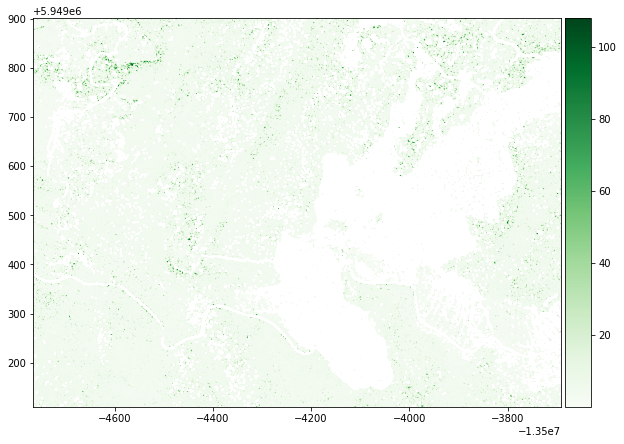

In [25]:
# Get path and chm filename
chm_file = 'test_chm.tif' #/path/to/your/chm/chm.tif
chm_filename = os.path.basename(chm_file)
chm_filename = chm_filename.split(sep="_")

# Open the CHM file with GDAL
chm_dataset = gdal.Open(chm_file)

# Get the raster band object
chm_raster = chm_dataset.GetRasterBand(1)

# Get the NO DATA value
noDataVal = chm_raster.GetNoDataValue()

# Get required metadata from CHM file
cols_chm = chm_dataset.RasterXSize
rows_chm = chm_dataset.RasterYSize
bands_chm = chm_dataset.RasterCount
mapinfo_chm = chm_dataset.GetGeoTransform()
xMin = mapinfo_chm[0]
yMax = mapinfo_chm[3]
xMax = xMin + chm_dataset.RasterXSize / mapinfo_chm[1]
yMin = yMax + chm_dataset.RasterYSize / mapinfo_chm[5]
image_extent = (xMin, xMax, yMin, yMax)

chm_array = chm_raster.ReadAsArray(0, 0, cols_chm, rows_chm).astype(np.float)

# Plot the CHM figure
plot_chm(
    chm_array,
    image_extent,
    "Canopy height Model",
    "Canopy height (m)",
    "Greens",
    [0, 9],
)

## Conclusion
This notebook walks through the creation of a canopy height model, through first making DSM and DTM products from the USGS 3D Elevation Program (3DEP) lidar point cloud data.

Feedback regarding the workflow, specific use cases, and any computational testing with the notebook are welcomed and encouraged! 

## Resources

* [OpenTopography Portal](https://portal.opentopography.org/datasets)
* [Amazon Web Services Entwine Point Tile (EPT) Bucket](https://registry.opendata.aws/usgs-lidar/) 
* [USGS 3DEP Entwine Portal](https://usgs.entwine.io/)
* [USGS Community for Data Integration (CDI)](https://www.usgs.gov/centers/community-for-data-integration-cdi)
* [PDAL Documentation](https://pdal.io/)